In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("dataset_Mall_Customers_K-means Algorithm.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h1>Trying to find out clusters </h1>

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

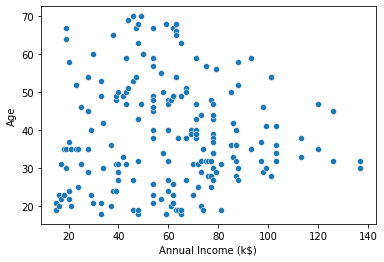

In [9]:
sns.scatterplot(y = df['Age'] , x= df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

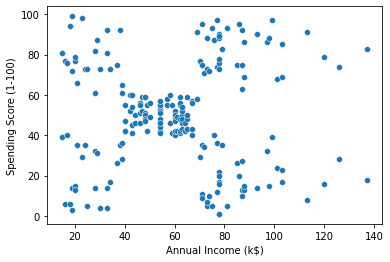

In [8]:
sns.scatterplot(y = df['Spending Score (1-100)'] , x= df['Annual Income (k$)'])

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

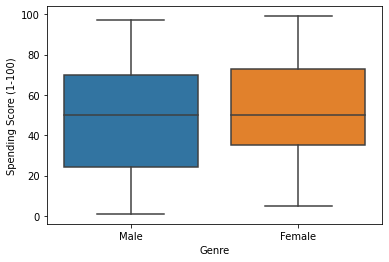

In [21]:
sns.boxplot(x = df['Genre'] , y = df['Spending Score (1-100)'])

In [33]:
features = [feature for feature in df.columns]

In [34]:
for feature in features:
    printx(len(df[feature].unique()))

200
2
51
64
84


In [35]:
len(df)

200

In [45]:
df[["Age" , "Annual Income (k$)" ,"Spending Score (1-100)"]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [36]:
df[["Age" , "Annual Income (k$)" ,"Spending Score (1-100)"]].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<h1> Standardising the Data </h1>

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[: , 2:])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [38]:
df.drop(columns = ["CustomerID"] , inplace = True)

<h1>Applying the Algorithm</h1>

In [41]:
from sklearn.cluster import KMeans

In [42]:
df['Genre'] = np.where(df['Genre'] == 'Male', 1, 0)

In [98]:
X = data_scaled

In [99]:
len(X)

200

In [100]:
df.iloc[: , 2: ]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<h1>
    Within the cluster squared sum (WCSS)
    Elbow Method
</h1>

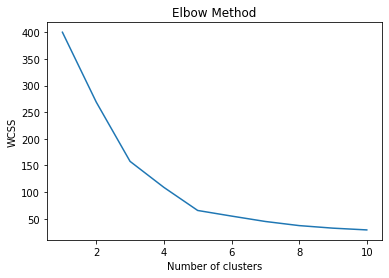

In [101]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

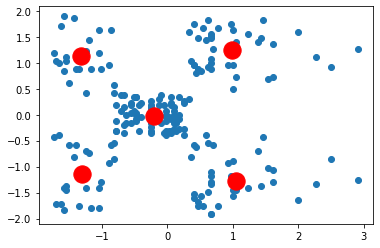

In [102]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()